# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import cv2
import numpy as np
from time import perf_counter
from matplotlib import pyplot as plt
import dlib
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

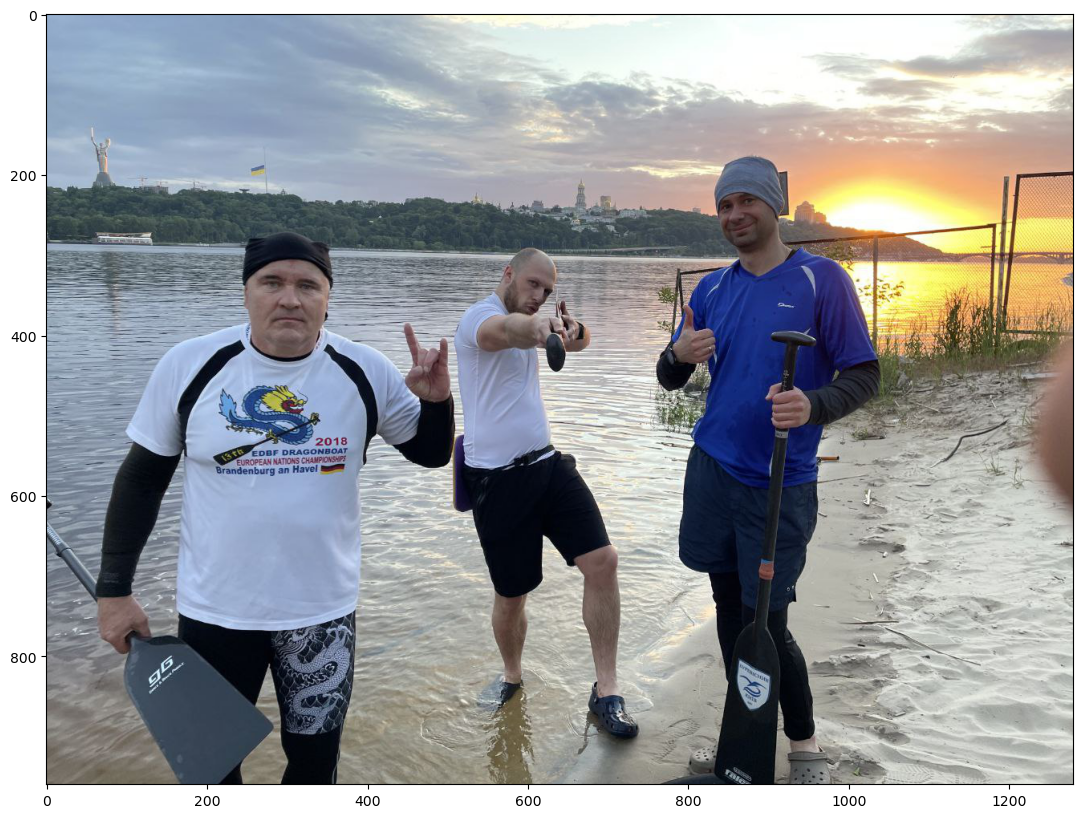

In [2]:
img = cv2.imread('data/photo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

### Step 2

Load the dlib face predictor.

(<AxesSubplot:title={'center':'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

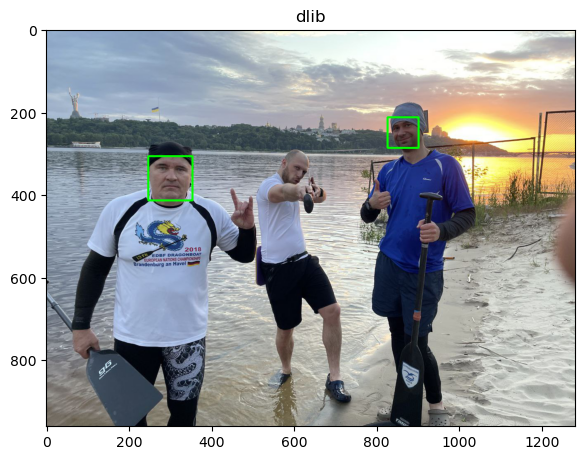

In [3]:
detector = dlib.get_frontal_face_detector()
rects = detector(gray, 1)

def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    
plt.subplot(122), plt.imshow(result_dlib), plt.title('dlib')

### Step 3

Run the predictor on your image.

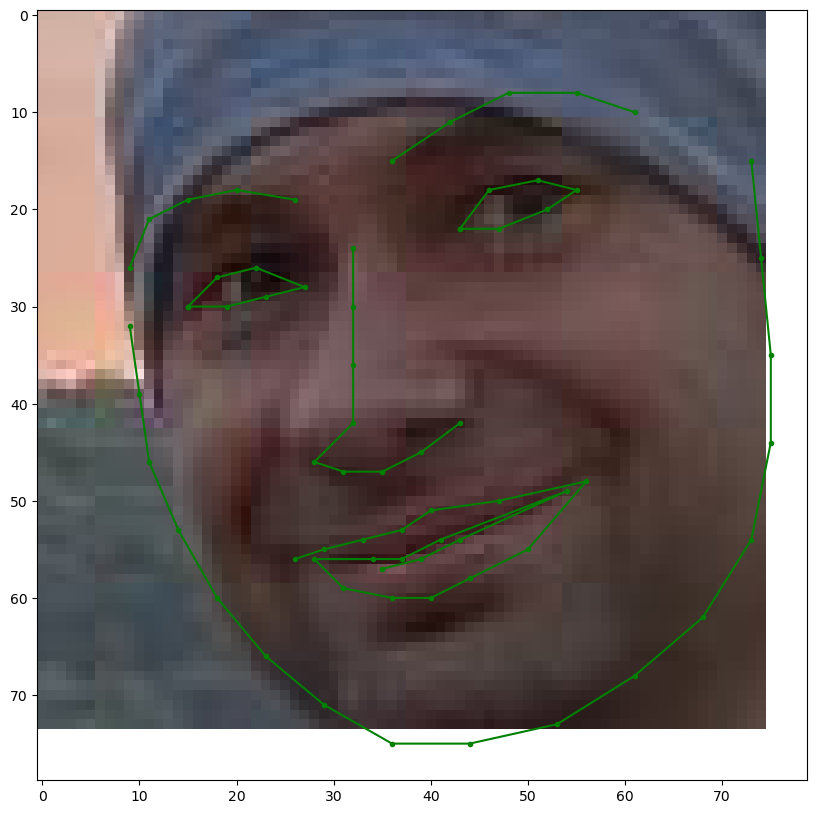

In [4]:
predictor = dlib.shape_predictor('data/shape_predictor_68_face_landmarks.dat')

face = faces_dlib_img[1]
rows, cols, _ = face.shape
rect = dlib.rectangle(0, 0, cols, rows)
shape = predictor(cv2.cvtColor(face, cv2.COLOR_RGB2GRAY), rect)

def plot_landmarks(vec):
    plt.plot(vec[0:17,0], vec[0:17,1], 'g.-')       # Contour
    plt.plot(vec[48:68,0], vec[48:68,1], 'g.-')     # Mouth
    plt.plot(vec[17:22,0], vec[17:22,1], 'g.-')     # Right eyebrow
    plt.plot(vec[22:27,0], vec[22:27,1], 'g.-')     # Left eyebrow
    plt.plot(np.concatenate((vec[36:42,0], vec[36:37,0])), np.concatenate((vec[36:42,1], vec[36:37,1])), 'g.-')     # Left eye
    plt.plot(np.concatenate((vec[42:48,0], vec[42:43,0])), np.concatenate((vec[42:48,1], vec[42:43,1])), 'g.-')     # Right eye
    plt.plot(vec[27:36,0], vec[27:36,1], 'g.-')     # Nose
    
kps = list(map(lambda p: (p.x, p.y), shape.parts()))
landmarks = np.array(kps)

plt.imshow(face)
plot_landmarks(landmarks)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<AxesSubplot:title={'center':'Aligned'}>,
 Text(0.5, 1.0, 'Aligned'))

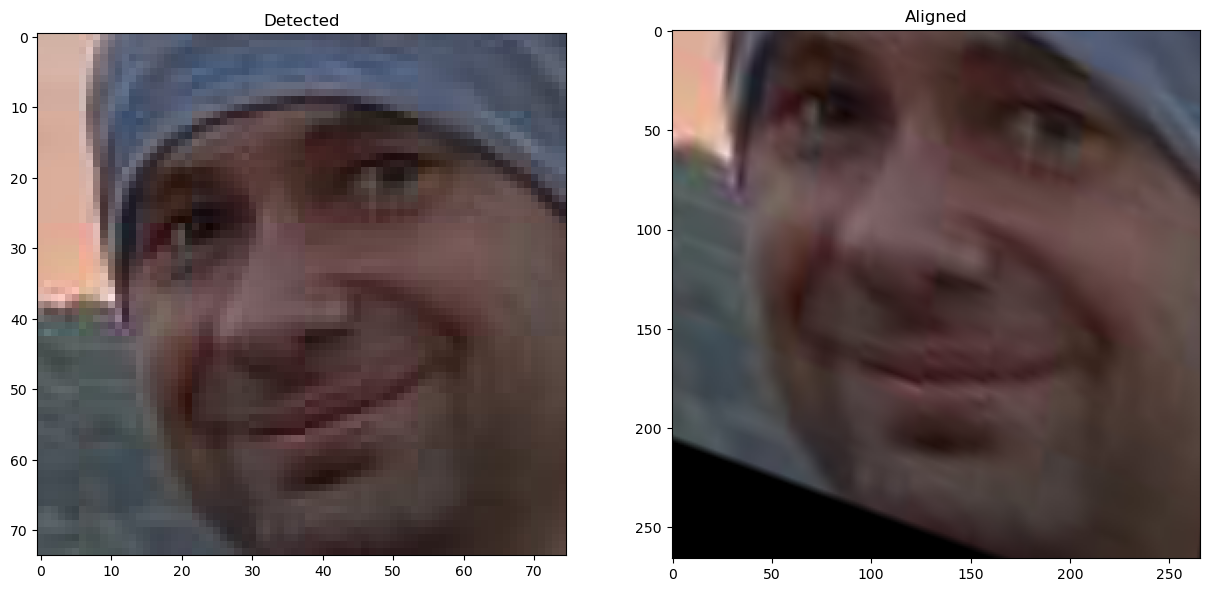

In [6]:
face_template = np.load('data/face_template.npy')

tpl_min, tpl_max = np.min(face_template, axis=0), np.max(face_template, axis=0)
face_template = (face_template - tpl_min) / (tpl_max - tpl_min)

plt.plot(face_template[:, 0], -face_template[:, 1], 'o')

inner_triangle = [39, 42, 57]
plt.plot(face_template[inner_triangle, 0], -face_template[inner_triangle, 1], 'rs')

plt.axis('square')
out_size = 256
margin = 10
out = np.copy(face)

# Prepare landmarks
landmarks = np.float32(landmarks)
landmarks_idx = np.array(inner_triangle)

# Adjust template (adjust to size, to margin and normalize back)
template = face_template * out_size
template = template + (margin/2)
template = template / (out_size + margin)

# Estimate affine transform
H = cv2.getAffineTransform(landmarks[landmarks_idx], (out_size + margin) * template[landmarks_idx])

# Rectify final image
aligned = cv2.warpAffine(out, H, (out_size + margin, out_size + margin))

plt.subplot(121), plt.imshow(face), plt.title('Detected')
plt.subplot(122), plt.imshow(aligned), plt.title('Aligned')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?